In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=8)
%matplotlib inline
# reload module each time cell is run
%load_ext autoreload
%autoreload 2

In [38]:
from Model import RetirementModelClass

In [39]:
# a. setup (calling the __init__ method) 
model = RetirementModelClass(name='baseline',solmethod='egm')

# b. print
#print(model)

# c. solve
model.solve()

# d. simulate
model.simulate()

envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope
envelope


In [40]:
import figs
from transitions import age

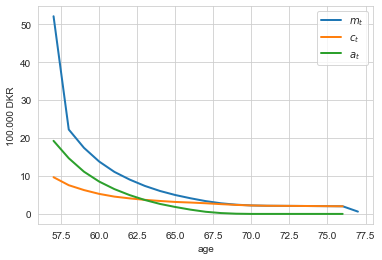

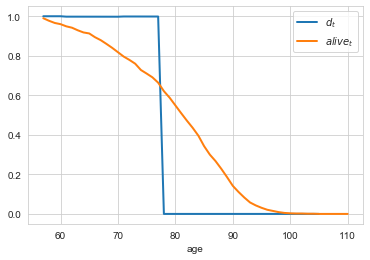

In [41]:
figs.lifecycle(model)
figs.lifecycle(model,['d','alive'])

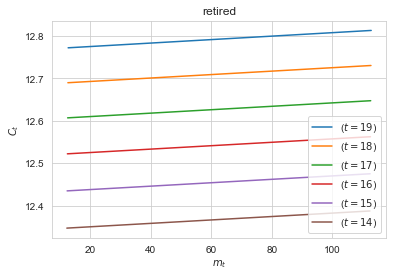

In [42]:
figs.cons_choice(model,[19,18,17,16,15,14],choice='retire')

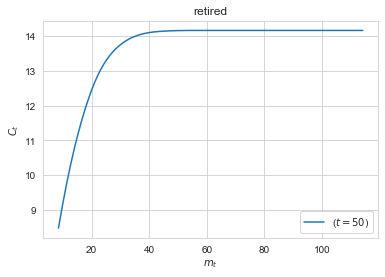

In [43]:
figs.cons_choice(model,[model.par.T-4],choice='retire')

In [48]:
model.sol.c[7][0:15]

array([[           nan, 1.00000000e-06],
       [           nan, 1.30490978e+00],
       [           nan, 2.60981855e+00],
       [           nan, 3.91472733e+00],
       [           nan, 5.21963610e+00],
       [           nan, 6.52454488e+00],
       [           nan, 7.82945365e+00],
       [           nan, 9.13436243e+00],
       [           nan, 1.04392712e+01],
       [           nan, 1.17441800e+01],
       [1.17126820e+01, 1.17441810e+01],
       [1.17128554e+01, 1.17637398e+01],
       [1.17130294e+01, 1.17637398e+01],
       [1.17132040e+01, 1.17637399e+01],
       [1.17133792e+01, 1.17637399e+01]])

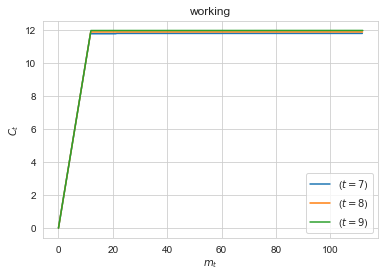

In [44]:
figs.cons_choice(model,[7,8,9],choice='work')

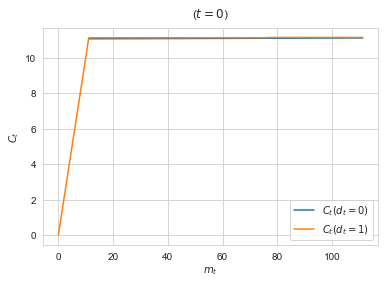

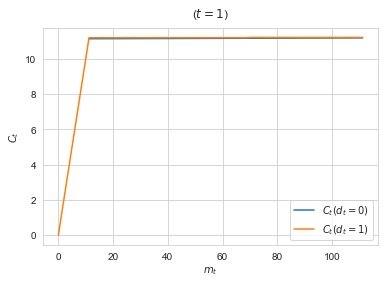

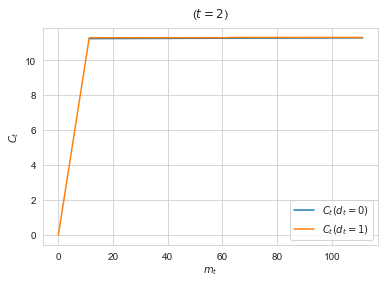

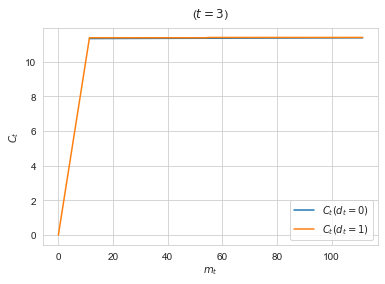

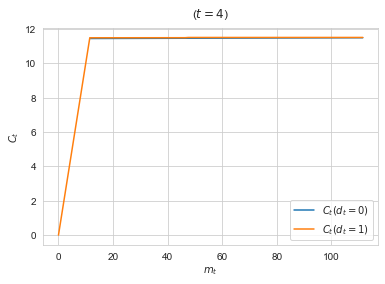

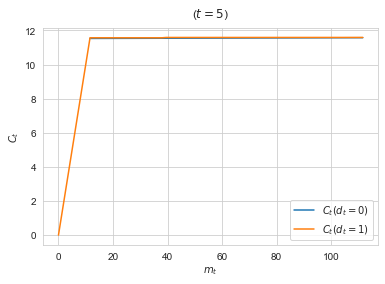

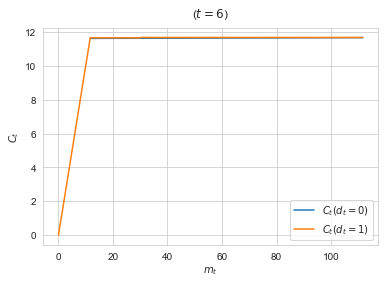

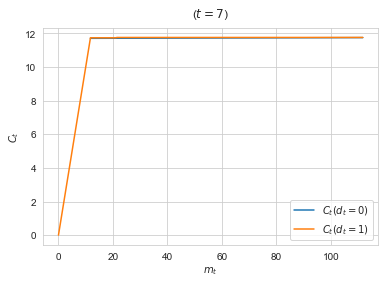

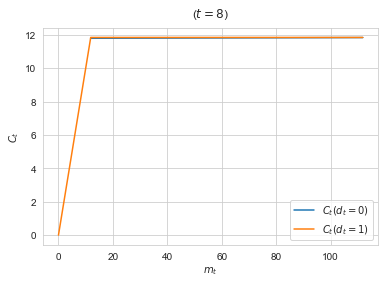

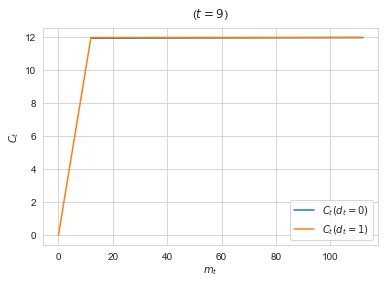

In [45]:
figs.cons_time(model,[0,1,2,3,4,5,6,7,8,9])